### To look at AP1 regulon interactions spatially, we need:
* AP1 LR interactions
* spatial slide with gene expression
* microenvironments from joint analysis

In [1]:
from pathlib import Path
import scanpy as sc
import pandas as pd

DPI = 300
FONTSIZE = 20  # 42
sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)

In [2]:
gene_sign = "AP1_regulon"
receiver = "ipEMT"

LR_DIR = Path("/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/nichenet/concat_withWu2022/nichenet_microenvall_celltypes/intersect_cellphonedb/")

SAMPLE_NAME = "Wu2022_ST_LM4"
#VIS_DIR = Path(f"/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Wu_2022/cell2location/{SAMPLE_NAME}/cell2location_map-no_cycling_TME/sp.h5ad")
VIS_DIR = Path(f"/data/BCI-CRC/nasrine/data/CRC/spatial/public/Visium_Wu_2022/qc/{SAMPLE_NAME}/{SAMPLE_NAME}_raw.h5ad")

In [3]:
FIG2SAVE = LR_DIR.joinpath(f"figures/final/{gene_sign}_{receiver}/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [4]:
# load LR interactions
lr_df = pd.read_csv(LR_DIR.joinpath(f"{gene_sign}{receiver}_final_LR_1Ligand_2_1Receptor.csv"),
                    sep=",",
                    header=0
                   )
lr_df.shape

(54, 20)

In [5]:
lr_df.head()

,interaction,from,to,potential,ECM CAF,IL1B Mac,Myofibroblast,NLRP3 Mac,Neutrophil,Pericyte,SPP1 Mac,Hypoxia,Intermediate,Stem,Stem (NOTUM high),TA1,ipEMT,pEMT,cancer_state_means,difference
0,ANXA1_EGFR,ANXA1,EGFR,0.903599,-0.606296,0.124196,-0.111946,0.399817,-0.794114,-0.790092,0.368269,0.026349,0.221319,-0.008100,-0.214795,-0.075118,0.275920,0.058559,-0.033643,0.309563
1,APOE_LDLR,APOE,LDLR,1.266901,-0.439042,0.722585,-0.485632,-0.507108,-0.684038,-0.474769,0.625684,0.102477,0.640323,-0.440371,-0.159299,0.002519,0.763670,0.178806,0.016422,0.747248
2,APP_TNFRSF21,APP,TNFRSF21,1.177156,1.381700,-0.147771,1.288103,-0.132199,-0.428970,0.999816,0.179003,0.237986,0.589617,-0.342606,-0.080913,-0.186580,0.168071,0.660101,-0.003190,0.171261
3,AREG_EGFR,AREG,EGFR,1.291173,-0.504070,-0.094787,-0.419878,0.968990,-0.474294,-0.531014,-0.066305,0.026349,0.221319,-0.008100,-0.214795,-0.075118,0.275920,0.058559,-0.033643,0.309563
4,CCL5_SDC4,CCL5,SDC4,0.953150,-0.188349,0.444938,0.079279,-0.120547,-0.228943,-0.327050,0.162887,-0.051832,0.150676,0.060090,-0.113427,0.020133,0.506929,0.251503,0.001592,0.505337


In [6]:
# load joint analysis of microenvrionmentts
JOINT_VIS_DIR = Path("/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/sp_segmentation_smoothness1.2.h5ad")
adata_joint = sc.read_h5ad(JOINT_VIS_DIR)

In [7]:
# load visium gene exp data of sample vis_sample
adata = sc.read_h5ad(VIS_DIR)
adata.shape

(3721, 19171)

### get labels of micrenvironmentts onto gene expression data 

In [8]:
adata.obs = adata.obs.merge(adata_joint.obs,
                how="left",
                left_index=True,
                right_index=True
               )

In [9]:
adata.obs.head(5)

,in_tissue,array_row,array_col,Sample,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,Tuft,UPR,cDC1,cDC2,gdT,ipEMT,migDC,pDC,pEMT,segmentation_labels
spot_id,,,,,,,,,,,,,,,,,,,,,
ST_LM_4_AAACAAGTATCTCCCA-1,1,50,102,ST_LM_4,3396,11746.0,33.407117,42.397412,52.605142,66.363017,...,6,3,1,6,9,44,1,6,164,9
ST_LM_4_AAACACCAATAACTGC-1,1,59,19,ST_LM_4,1132,2269.0,33.935654,43.587483,55.046276,72.146320,...,7,2,2,1,1,8,2,1,31,9
ST_LM_4_AAACAGAGCGACTCCT-1,1,14,94,ST_LM_4,3186,7736.0,21.160807,30.584281,41.184074,56.049638,...,5,17,11,6,1,2056,5,1,1576,5
ST_LM_4_AAACAGCTTTCAGAAG-1,1,43,9,ST_LM_4,1234,2260.0,25.619469,36.150442,48.362832,67.522124,...,2,1,4,29,3,8,5,2,10,1
ST_LM_4_AAACAGGGTCTATATT-1,1,47,13,ST_LM_4,745,1295.0,32.123552,43.166023,57.915058,81.081081,...,3,2,0,0,1,3,0,0,15,9


### normalise and log1p the data + z-score

In [10]:
### log normalise 
# keep raw
adata.layers["raw"] = adata.X.copy()  # preserve counts

# normalize + log1p
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
adata.layers["normalised"] = adata.X.copy()
sc.pp.log1p(adata)

adata.layers["log1p"] = adata.X.copy()

adata.raw = adata  # keep normalised log1p

In [11]:
### z score 
adata_zscore = adata.raw.to_adata().copy()
# scale and store results in layer for later plotting
adata_zscore.layers['scaled'] = sc.pp.scale(adata_zscore, copy=True).X
adata_zscore.obs=adata.obs

### Check that the interactions are acctually in the sppatial data. i.e ligands and receptor ppairs are expressed


In [12]:
# find ligands that are not in adata
l2exclude = [l for l in lr_df["from"] if l not in adata_zscore.var_names]
l2exclude

[]

In [13]:
# find receptors that are not in adata
r2exclude = [r for r in lr_df["to"] if r not in adata_zscore.var_names]
r2exclude

['GRM7']

In [14]:
# exclude these from the interacttions
# remove receptor ligand interractisn that don't have expression spatially
lr_df = lr_df.loc[~lr_df["to"].isin(r2exclude)].copy()
lr_df = lr_df.loc[~lr_df["from"].isin(l2exclude)].copy()
lr_df.shape

(53, 20)

### subset to get just genes from LR interactions

In [15]:
adata_ligand = adata_zscore[:, lr_df["from"]].copy()

In [16]:
adata_ligand.shape

(3721, 53)

### compute average z-score in each microenv

In [17]:
ligand_microenv_zscore_df = pd.DataFrame(index=adata_ligand.obs.segmentation_labels.cat.categories,
                                         columns=lr_df.interaction
                                        )
ligand_microenv_zscore_df.head(5)

interaction,ANXA1_EGFR,APOE_LDLR,APP_TNFRSF21,AREG_EGFR,CCL5_SDC4,CDH2_CDON,COL15A1_ITGB1,COL1A2_ITGB1,COL27A1_ITGB1,COL3A1_ITGB1,...,TNC_ITGB6,TNF_TNFRSF1A,TNFSF10_TNFRSF11B,TNFSF12_TNFRSF12A,TNFSF13_TNFRSF1A,TNFSF9_PVR,VCAM1_EZR,VEGFA_FLT1,VEGFB_FLT1,WNT5A_ROR2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for microenv in adata_ligand.obs.segmentation_labels.cat.categories:
    ligand_microenv_zscore_df.loc[microenv, :] = adata_ligand[
        adata_ligand.obs.segmentation_labels==microenv].layers["scaled"].mean(axis=0)
ligand_microenv_zscore_df = ligand_microenv_zscore_df.astype(float)

In [19]:
ligand_microenv_zscore_df.head(5)

interaction,ANXA1_EGFR,APOE_LDLR,APP_TNFRSF21,AREG_EGFR,CCL5_SDC4,CDH2_CDON,COL15A1_ITGB1,COL1A2_ITGB1,COL27A1_ITGB1,COL3A1_ITGB1,...,TNC_ITGB6,TNF_TNFRSF1A,TNFSF10_TNFRSF11B,TNFSF12_TNFRSF12A,TNFSF13_TNFRSF1A,TNFSF9_PVR,VCAM1_EZR,VEGFA_FLT1,VEGFB_FLT1,WNT5A_ROR2
0,0.751942,0.026248,0.322152,0.181577,0.343744,-0.035971,1.071729,1.167846,0.050765,1.062132,...,0.565263,0.167721,0.092073,0.221660,0.474995,0.122078,0.276503,0.208200,0.433960,0.322418
1,-0.311395,0.238032,-0.423690,-0.473651,-0.008081,0.103772,-0.333085,-0.359253,0.023572,-0.189792,...,-0.143995,-0.022816,-0.151522,-0.103834,-0.179522,-0.067564,-0.012133,-0.360674,-0.162848,-0.089008
3,0.555467,0.335443,0.163513,-0.289415,0.394556,0.284838,-0.066646,0.589748,0.025024,0.744294,...,0.116891,0.013108,-0.008135,0.394252,0.404754,0.026920,0.586931,-0.070083,0.334968,-0.019873
4,-0.054023,-0.698611,0.686576,1.205015,-0.206189,-0.283387,0.016914,-0.196882,-0.078108,-0.186429,...,-0.055668,-0.003351,0.109274,-0.079151,-0.015511,0.199950,-0.256760,0.264449,0.048031,0.096546
5,0.308146,-0.356468,0.345742,0.481748,-0.033148,-0.094578,0.350133,0.513693,0.017842,0.318633,...,0.407141,0.001239,-0.010959,-0.003119,0.191185,0.127393,0.020833,0.512142,0.063269,0.101501


In [20]:
# make a column for the colour for each microenv
colour_dict = {
    0: "#fdb462", #0
    1: "#FCCDE5", #1
    2: "#FB8072", #2
    3: "#e78ac3", #3
    4: "#67A9CF", #4
    5: "#feed8b", #5
    6: "#1f78b4", #6
    7: "#91CF60", #7 
    8: "#b3ffff", #8 
    9: "#33a02c" #9
}
microenv_colors = ligand_microenv_zscore_df.index.map(colour_dict)

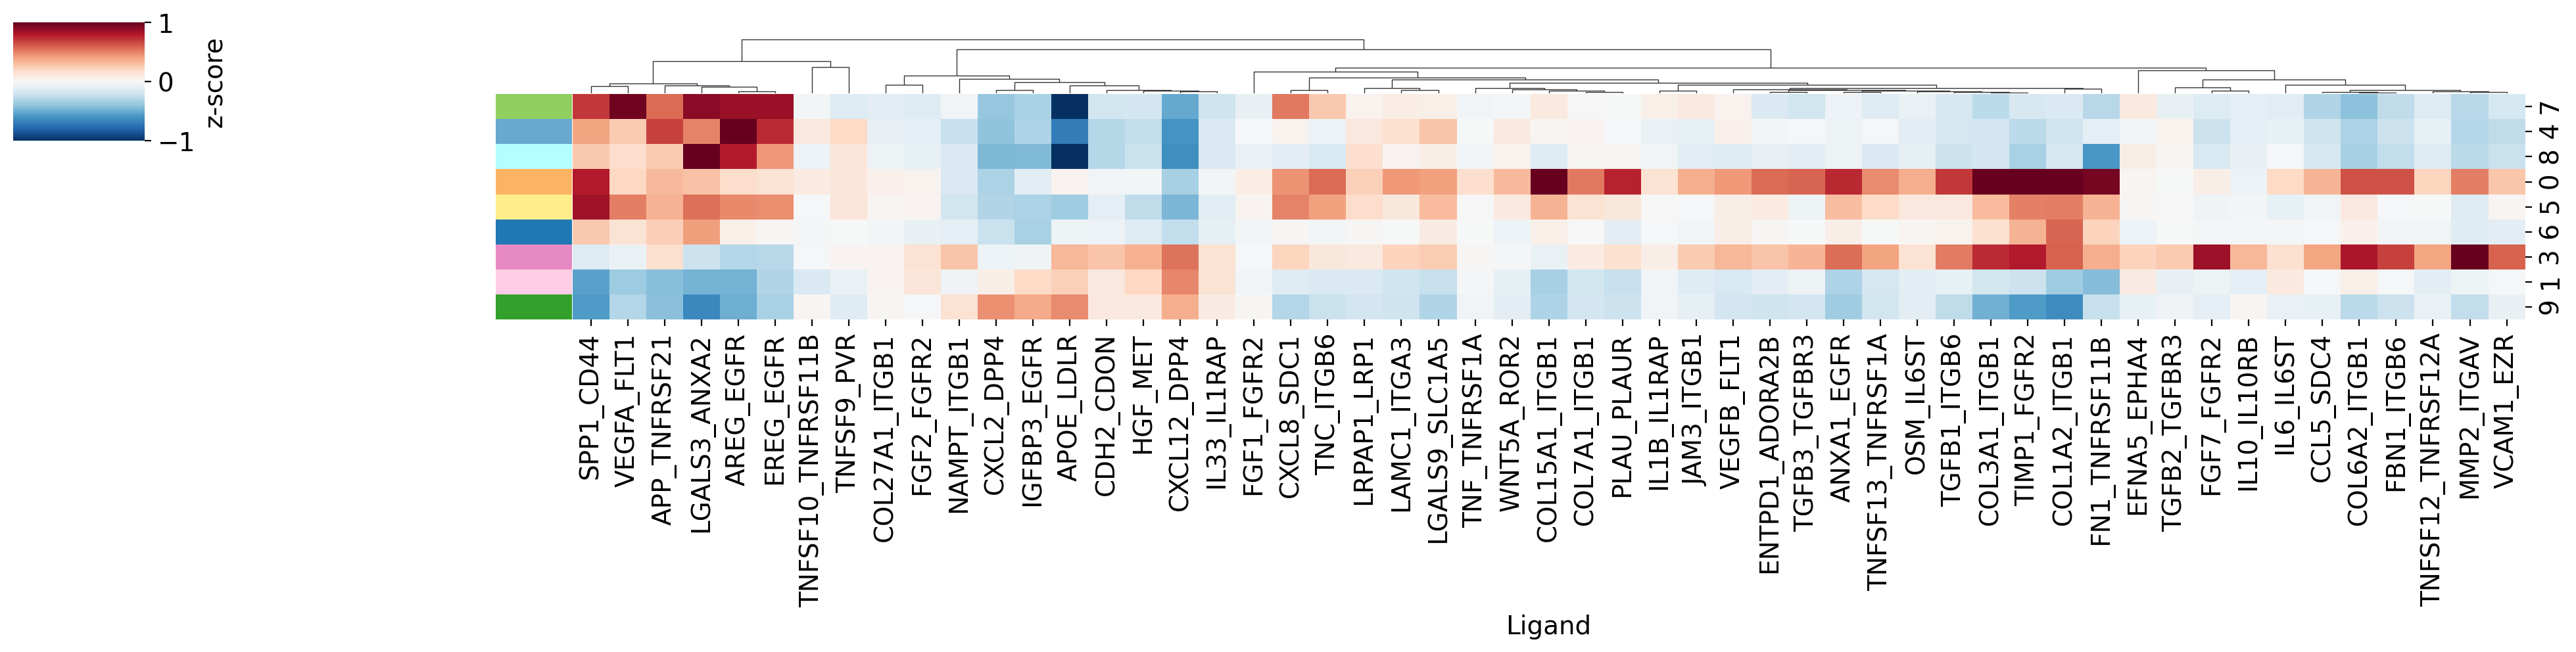

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

row_linkage, col_linkage = (hc.linkage(sp.distance.pdist(x, metric="correlation"), method="average")
  for x in (ligand_microenv_zscore_df.values, ligand_microenv_zscore_df.values.T))

ax = sns.clustermap(ligand_microenv_zscore_df, 
                    row_linkage=row_linkage,
                    col_linkage=col_linkage,
                    vmin=-1, vmax=1, cbar_kws={'label': 'z-score'}, 
                    row_colors=microenv_colors, cmap="RdBu_r", linecolor="black", figsize=(20,5))
ax.ax_heatmap.set_xlabel("Ligand")
ax.ax_row_dendrogram.set_visible(False)
#ax.ax_col_dendrogram.set_visible(False)
plt.savefig(FIG2SAVE.joinpath(f'{gene_sign}_{receiver}_{SAMPLE_NAME}_microenvs_zscore_ligands.pdf'), dpi=DPI,
            format="pdf", bbox_inches="tight",)

### subset to just get receptors

In [22]:
adata_receptor = adata_zscore[:, lr_df["to"]].copy()
adata_receptor.shape

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(3721, 53)

In [23]:
receptor_microenv_zscore_df = pd.DataFrame(index=adata_receptor.obs.segmentation_labels.cat.categories,
                                         columns=lr_df.interaction
                                        )
receptor_microenv_zscore_df.head(5)

interaction,ANXA1_EGFR,APOE_LDLR,APP_TNFRSF21,AREG_EGFR,CCL5_SDC4,CDH2_CDON,COL15A1_ITGB1,COL1A2_ITGB1,COL27A1_ITGB1,COL3A1_ITGB1,...,TNC_ITGB6,TNF_TNFRSF1A,TNFSF10_TNFRSF11B,TNFSF12_TNFRSF12A,TNFSF13_TNFRSF1A,TNFSF9_PVR,VCAM1_EZR,VEGFA_FLT1,VEGFB_FLT1,WNT5A_ROR2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for microenv in adata_receptor.obs.segmentation_labels.cat.categories:
    receptor_microenv_zscore_df.loc[microenv, :] = adata_receptor[
        adata_receptor.obs.segmentation_labels==microenv].layers["scaled"].mean(axis=0)
receptor_microenv_zscore_df = receptor_microenv_zscore_df.astype(float)

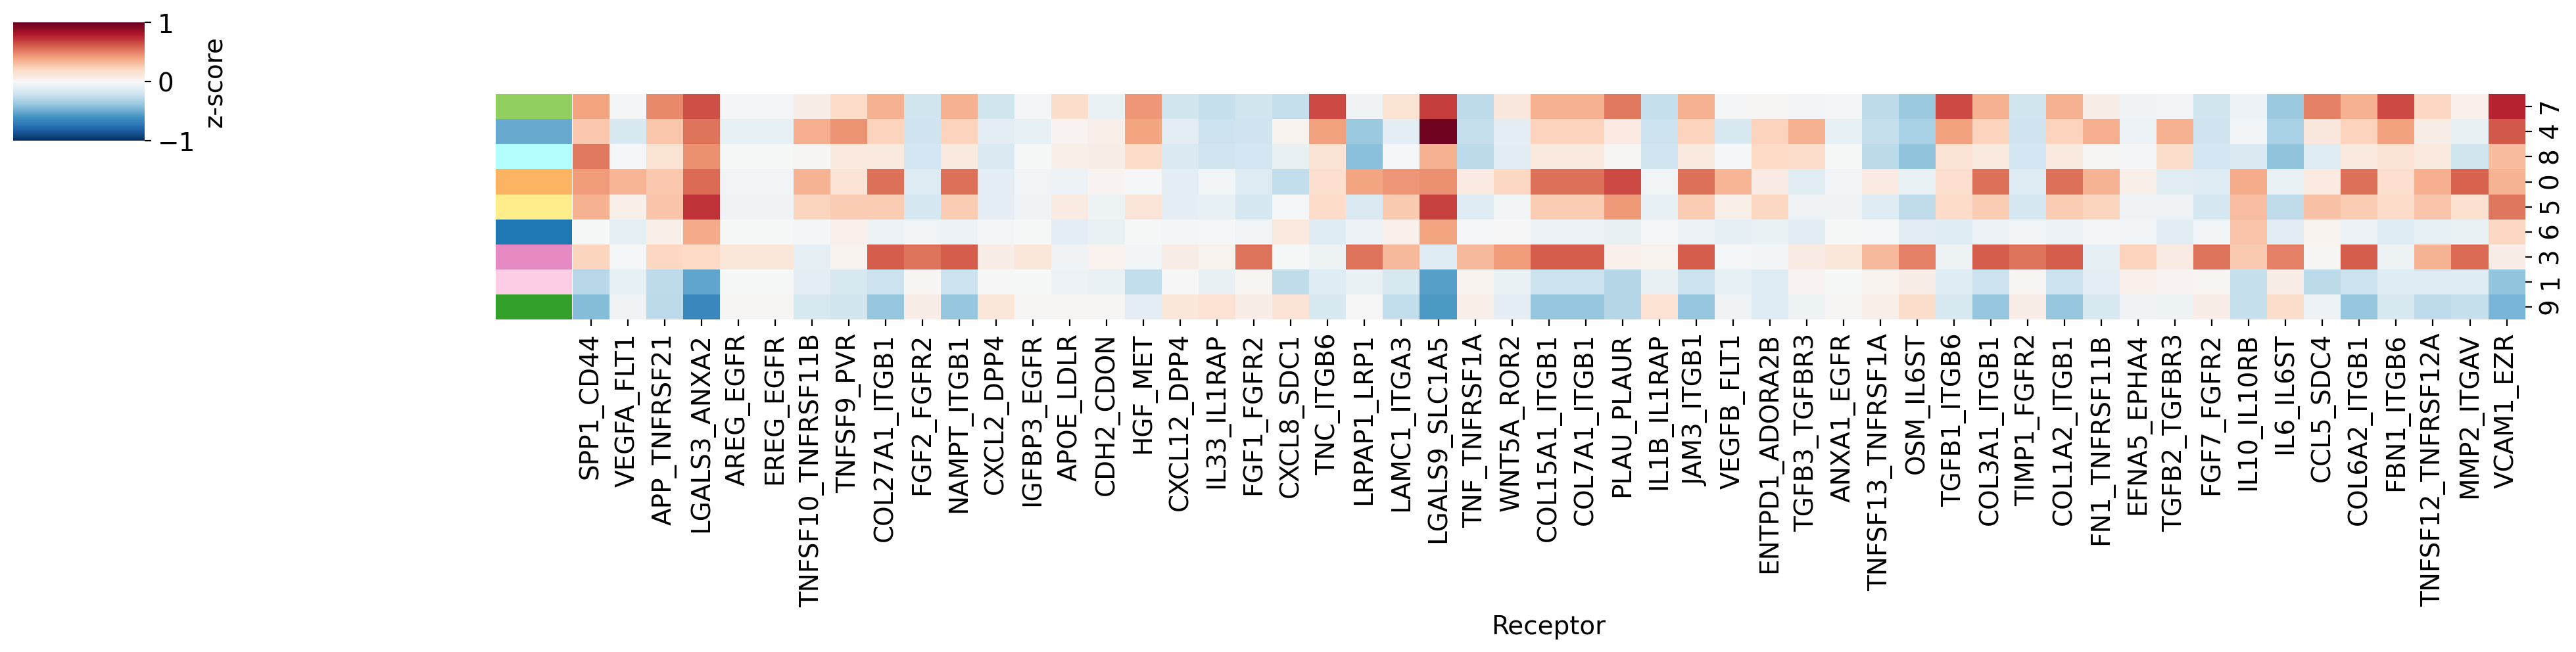

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

ax = sns.clustermap(receptor_microenv_zscore_df, 
                    row_linkage=row_linkage,
                    col_linkage=col_linkage,
                    vmin=-1, vmax=1, cbar_kws={'label': 'z-score'}, 
                    row_colors=microenv_colors, cmap="RdBu_r", linecolor="black", figsize=(20,5))
ax.ax_heatmap.set_xlabel("Receptor")
ax.ax_row_dendrogram.set_visible(False)
ax.ax_col_dendrogram.set_visible(False)
plt.savefig(FIG2SAVE.joinpath(f'{gene_sign}_{receiver}_{SAMPLE_NAME}_microenvs_zscore_receptors.pdf'), dpi=DPI,
            format="pdf", bbox_inches="tight",)